In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [20]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [21]:
train_df.columns


Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [22]:
train_df.head().T


,0,1,2,3,4
id,0,1,2,3,4
N_Days,999,2574,3428,2576,788
Drug,D-penicillamine,Placebo,Placebo,Placebo,Placebo
Age,21532,19237,13727,18460,16658
Sex,M,F,F,F,F
Ascites,N,N,N,N,N
Hepatomegaly,N,N,Y,N,Y
Spiders,N,N,Y,N,N
Edema,N,N,Y,N,N
Bilirubin,2.3,0.9,3.3,0.6,1.1


In [23]:
train_df.isna().sum()


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [24]:
test_df.isna().sum()


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [25]:
train_df.duplicated().sum()


0

In [26]:
train_df.columns = train_df.columns.str.lower().str.replace(' ', '_')
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')


In [27]:
train_df.columns

Index(['id', 'n_days', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'edema', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
       'stage', 'status'],
      dtype='object')

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   n_days         7905 non-null   int64  
 2   drug           7905 non-null   object 
 3   age            7905 non-null   int64  
 4   sex            7905 non-null   object 
 5   ascites        7905 non-null   object 
 6   hepatomegaly   7905 non-null   object 
 7   spiders        7905 non-null   object 
 8   edema          7905 non-null   object 
 9   bilirubin      7905 non-null   float64
 10  cholesterol    7905 non-null   float64
 11  albumin        7905 non-null   float64
 12  copper         7905 non-null   float64
 13  alk_phos       7905 non-null   float64
 14  sgot           7905 non-null   float64
 15  tryglicerides  7905 non-null   float64
 16  platelets      7905 non-null   float64
 17  prothrombin    7905 non-null   float64
 18  stage   

In [29]:
df_numeric = train_df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.drop(['id'], axis=1)


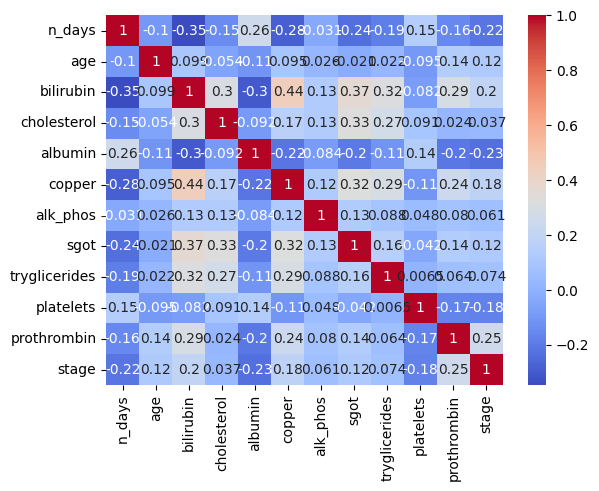

In [30]:
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [31]:
df_categorical = train_df.select_dtypes(include=['object'])
df_categorical.head()

,drug,sex,ascites,hepatomegaly,spiders,edema,status
0,D-penicillamine,M,N,N,N,N,D
1,Placebo,F,N,N,N,N,C
2,Placebo,F,N,Y,Y,Y,D
3,Placebo,F,N,N,N,N,C
4,Placebo,F,N,Y,N,N,C


In [40]:
df_full_train, df_test = train_test_split(train_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 


In [41]:
len(df_train), len(df_val), len(df_test)


(4743, 1581, 1581)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values


del df_train['status']
del df_val['status']
del df_test['status']

In [43]:
categorical = list(train_df.dtypes[train_df.dtypes == 'object'].index)
categorical.remove("status")
categorical


['drug', 'sex', 'ascites', 'hepatomegaly', 'spiders', 'edema']

In [44]:

numerical = list(train_df.select_dtypes(include=['int64', 'float64']))
numerical

['id',
 'n_days',
 'age',
 'bilirubin',
 'cholesterol',
 'albumin',
 'copper',
 'alk_phos',
 'sgot',
 'tryglicerides',
 'platelets',
 'prothrombin',
 'stage']

In [45]:
from sklearn.feature_extraction import DictVectorizer


In [46]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [47]:
from sklearn.linear_model import LogisticRegression


In [48]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/Users/swordfish/opt/miniconda3/envs/mlops-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
dicts_test = test_df[categorical + numerical].to_dict(orient='records')


In [50]:
X_test = dv.transform(dicts_test)


In [51]:
y_pred = model.predict_proba(X_test)[:, 1]


In [54]:
y_val

array(['C', 'CL', 'C', ..., 'C', 'C', 'D'], dtype=object)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [60]:

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

ValueError: multi_class must be in ('ovo', 'ovr')

In [61]:
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb

In [62]:
train_dicts = df_train.fillna(0).to_dict(orient='records')


In [63]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [64]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [65]:
features = dv.feature_names_


In [66]:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

ValueError: could not convert string to float: 'C'

In [ ]:
df[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos','SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']] = scaler.fit_transform(df[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos','SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]) 
